# Example: Fit Canonical Phase-Type NHPP Models

This notebook loads the bundled MUSA ss1a dataset and fits an exponential NHPP model.

In [1]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat as srat

In [2]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_intervals(
    time=df["time"].to_numpy(dtype=float),
    fault=df["fault"].to_numpy(dtype=float),
    type=df["indicator"].to_numpy(dtype=int)
)

In [3]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1g.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_counts(fault=df["fault"].to_numpy(dtype=float))

In [4]:
models = {
    "phase5": srat.CanonicalPhaseTypeNHPP(5),
    "phase10": srat.CanonicalPhaseTypeNHPP(10),
    "phase20": srat.CanonicalPhaseTypeNHPP(20),
    "phase50": srat.CanonicalPhaseTypeNHPP(50),
    "phase100": srat.CanonicalPhaseTypeNHPP(100),
    "phase200": srat.CanonicalPhaseTypeNHPP(200)
}

for model in models.values():
    model.fit(data, verbose=True)

/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
for model in models.values():
    summary = srat.eic_srm(model, bsample=50)
    print(summary)

{'bias': 4.960820792809029, 'bias.lower': 4.049276518437998, 'bias.upper': 5.87236506718006, 'eic': 361.9706457199924, 'eic.lower': 360.14755717125036, 'eic.upper': 363.79373426873445}


/Users/okamu/Documents/pysrat/src/pysrat/_em.py:136: UserWarning: Did not converge to MLE by max iteration.
  warnings.warn("Did not converge to MLE by max iteration.")


{'bias': 9.549584708684666, 'bias.lower': 8.122133488681298, 'bias.upper': 10.977035928688034, 'eic': 358.6891820688394, 'eic.lower': 355.83427962883263, 'eic.upper': 361.5440845088461}
{'bias': 11.101491797132239, 'bias.lower': 8.962253984139043, 'bias.upper': 13.240729610125435, 'eic': 346.9129716823406, 'eic.lower': 342.6344960563542, 'eic.upper': 351.191447308327}


/Users/okamu/Documents/pysrat/src/pysrat/dists/cf1.py:189: RuntimeWarning: invalid value encountered in log
  llf += np.sum(faults0[i] * np.log(omega * barp[i]) - gammaln(faults0[i] + 1.0))


{'bias': nan, 'bias.lower': nan, 'bias.upper': nan, 'eic': nan, 'eic.lower': nan, 'eic.upper': nan}


/Users/okamu/Documents/pysrat/src/pysrat/dists/cf1.py:189: RuntimeWarning: divide by zero encountered in log
  llf += np.sum(faults0[i] * np.log(omega * barp[i]) - gammaln(faults0[i] + 1.0))


{'bias': nan, 'bias.lower': nan, 'bias.upper': nan, 'eic': nan, 'eic.lower': nan, 'eic.upper': nan}
{'bias': nan, 'bias.lower': nan, 'bias.upper': nan, 'eic': nan, 'eic.lower': nan, 'eic.upper': nan}


<Axes: xlabel='time', ylabel='# of faults'>

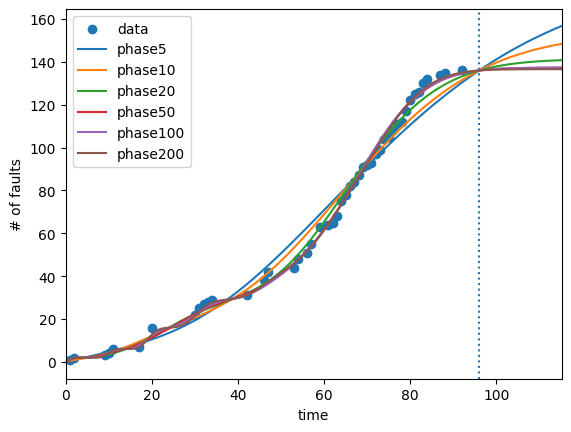

In [5]:
srat.plot_mvf(data, models)

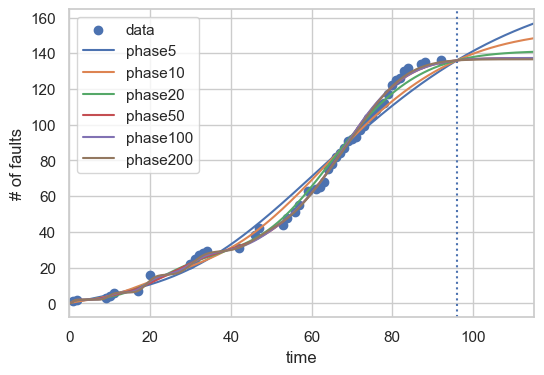

In [6]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srat.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

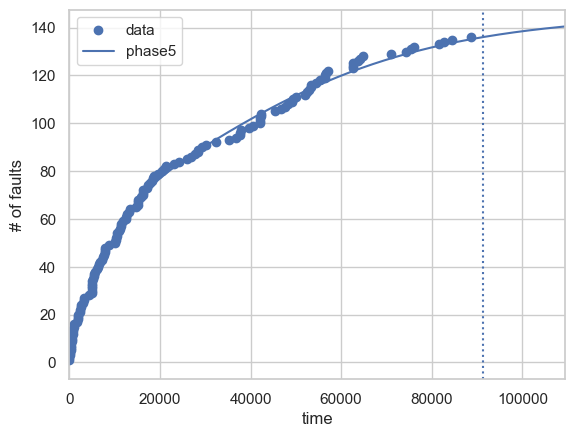

In [39]:
best_key = min(models, key=lambda k: models[k].aic_)
srat.plot_mvf(data, {best_key: models[best_key]})